In [2]:
from subprocess import *
import matplotlib.pyplot as plt


In [13]:
ns = range(100, 1600, 100)
res = ''
c_no_opt = []

In [27]:
c_no_opt = []
c_opt_nosimd = []
c_opt = []
for n in ns:
    res = run(['./no_opt', str(n)], stdout=PIPE)
    output = res.stdout.decode('utf-8')
    output = output.splitlines()[-1]
    output = float(output)
    print(output)
    c_no_opt.append(float(output))

    res = run(['./opt_nosimd', str(n)], stdout=PIPE)
    output = res.stdout.decode('utf-8')
    output = output.splitlines()[-1]
    output = float(output)
    print(output)
    c_opt_nosimd.append(float(output))

    res = run(['./opt', str(n)], stdout=PIPE)
    output = res.stdout.decode('utf-8')
    output = output.splitlines()[-1]
    output = float(output)
    print(output)
    c_opt.append(float(output))

2760974.0
521452.0
249712.0
23266121.0
3511849.0
2041562.0
71740120.0
12031412.0
7441065.0
172773620.0
26233913.0
17568441.0
355439227.0
58977685.0
33201400.0
646620721.0
89422990.0
59418356.0
926161974.0
141081467.0
100681982.0
1396173782.0
225376280.0
150868064.0
2085087424.0
318540028.0
209566416.0
2901587720.0
440506959.0
285153240.0
3792066331.0
564363551.0
435934240.0
4819590286.0
874585435.0
572523517.0
6391333616.0
995757931.0
655807907.0
7885626231.0
1430255652.0
921330049.0
9660550534.0
1520407582.0
1072597293.0


In [28]:
c_no_opt = [n * n * n / c for (n, c) in zip(ns, c_no_opt)]
c_opt_nosimd = [n * n * n / c for (n, c) in zip(ns, c_opt_nosimd)]
c_opt = [n * n * n / c for (n, c) in zip(ns, c_opt)]

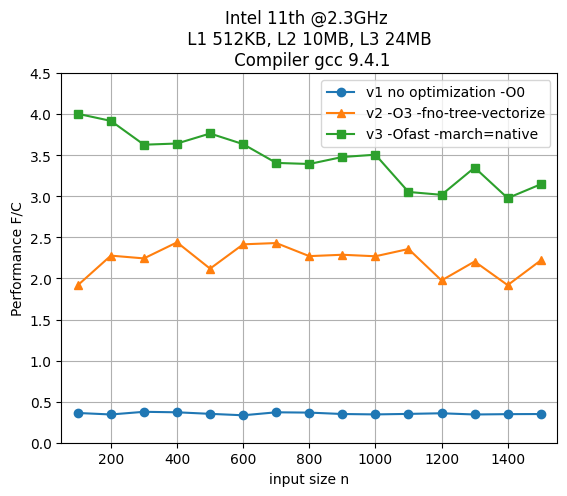

In [32]:
plt.axis([50, 1550, 0, 4.5])
plt.plot(ns, c_no_opt, marker='o', label='v1 no optimization -O0')
plt.plot(ns, c_opt_nosimd, marker='^', label='v2 -O3 -fno-tree-vectorize')
plt.plot(ns, c_opt, marker='s', label='v3 -Ofast -march=native')
# Customize the plot
plt.xlabel('input size n')
plt.ylabel('Performance F/C')
plt.title('Intel 11th @2.3GHz \n L1 512KB, L2 10MB, L3 24MB \n Compiler gcc 9.4.1')
plt.grid(True)

# Add a legend
plt.legend()

In [33]:
ns = [2**x for x in range(4, 28)]
# c_no_opt = []
c_opt = []
for n in ns:
    # res = run(['./p4_1', str(n)], stdout=PIPE)
    # output = res.stdout.decode('utf-8')
    # output = output.splitlines()[-1]
    # output = float(output)
    # print(output)
    # c_no_opt.append(float(output))

    res = run(['./p4_2', str(n)], stdout=PIPE)
    output = res.stdout.decode('utf-8')
    output = output.splitlines()[-1]
    output = float(output)
    print(output)
    c_opt.append(float(output))

71.0
73.0
107.0
219.0
343.0
606.0
1147.0
2242.0
5015.0
10101.0
18488.0
41712.0
103658.0
249436.0
548645.0


KeyboardInterrupt: 

In [27]:
c_no_opt_bak = c_no_opt
c_opt_bak = c_opt

In [28]:

c_no_opt = [4 * n / c for (n, c) in zip(ns, c_no_opt)]
c_opt = [4 * n / c for (n, c) in zip(ns, c_opt)]

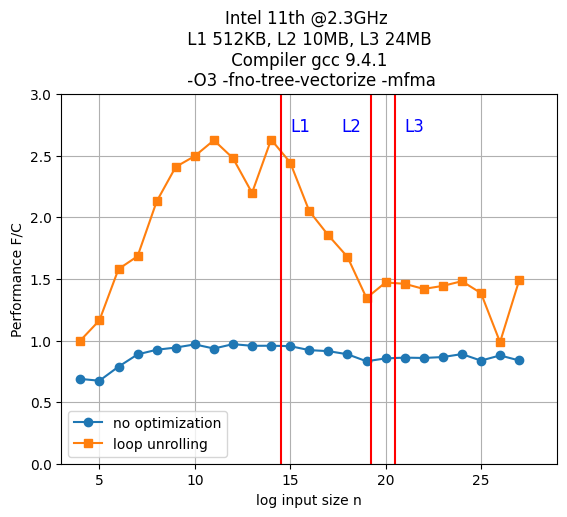

In [32]:
ns = range(4, 28)
plt.axis([3, 29, 0, 3])
plt.plot(ns, c_no_opt, marker='o', label='no optimization')
plt.plot(ns, c_opt, marker='s', label='loop unrolling')
# Customize the plot
plt.xlabel('log input size n')
plt.ylabel('Performance F/C')
plt.title('Intel 11th @2.3GHz \n L1 512KB, L2 10MB, L3 24MB \n Compiler gcc 9.4.1 \n -O3 -fno-tree-vectorize -mfma')
plt.grid(True)

plt.axvline(x = 14.5, color = 'red')
plt.text(15, 2.7, 'L1', color = 'blue', fontdict={'fontsize': 'large'})
plt.axvline(x = 19.25, color = 'red')
plt.text(17.7, 2.7, 'L2', color = 'blue', fontdict={'fontsize': 'large'})
plt.axvline(x = 20.5, color = 'red')
plt.text(21, 2.7, 'L3', color = 'blue', fontdict={'fontsize': 'large'})


# Add a legend
plt.legend()